# Conceptual

## 4. The Curse of Dimensionality

When the number of features p is large, there tends to be a deteri- oration in the performance of KNN and other local approaches that perform prediction using only observations that are near the test ob- servation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that non-parametric approaches often perform poorly when p is large. We will now investigate this curse.

### (a) p = 1

Suppose that we have a set of observations, each with measurements on p = 1 feature, X. We assume that X is uniformly distributed on [0,1]. Associated with each observation is a response value. Suppose that we wish to predict a test obser- vation’s response using only observations that are within 10 % of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55,0.65]. On average, what fraction of the available observations will we use to make the prediction?

In [1]:
print('{:.1%}'.format((0.65-0.55)/(1-0)))

10.0%


### (b) p = 2

Now suppose that we have a set of observations, each with measurements on p = 2 features, X1 and X2. We assume that (X1,X2) are uniformly distributed on [0,1]×[0,1]. We wish to predict a test observation’s response using only observations that are within 10 % of the range of X1 and within 10 % of the range of X2 closest to that test observation. For instance, in order to predict the response for a test observation with X1 = 0.6 and X2 = 0.35, we will use observations in the range [0.55, 0.65] for X1 and in the range [0.3, 0.4] for X2. On average, what fraction of the available observations will we use to make the prediction?

In [2]:
print('{:.1%}'.format(0.1*0.1))

1.0%


### (c) 

Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10 % of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

In [3]:
pow(0.1,100)

1.0000000000000056e-100

### (d) 

Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there are very few training obser- vations “near” any given test observation.

When there are a large number of dimensions, the percentage of observations that can be used to predict with KNN becomes very small. This means that for a set sample size, more features leads to fewer neighbors.

### (e) 

Now suppose that we wish to make a prediction for a test obser- vation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10 % of the train- ing observations. For p = 1,2, and 100, what is the length of each side of the hypercube? Comment on your answer.

In [4]:
def side(p):
    return print(pow(0.1,(1/p)))

p=1
side(p)
p=2
side(p)
p=100
side(p)

0.1
0.31622776601683794
0.9772372209558107


## 5. differences between LDA and QDA

### (a) 

If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

- Training: QDA should perform best as higher variance model has increased flexibility to fit noise in the data

- Test: LDA should perform best as increased bias is without cost if Bayes decision boundary is linear.

### (b) 

If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

- Training: QDA should perform best as higher variance model has increased flexibility to fit non-linear relationship in data and noise

- Test: QDA should perform best as higher variance model has increased flexibility to fit non-linear relationship in data

### (c) 

In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

Improve, as increased sample size reduces a more flexible models tendency to overfit the training data.

### (d) 

True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test error rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.

False. If the bayes decision boundary is linear, then a more flexible model is prone to overfit and take account of noise in the training data that will reduce its accuracy in making predictions during test.

## 6. Logistic regression

Suppose we collect data for a group of students in a statistics class with variables $X_1$ = hours studied, $X_2$ = undergrad GPA, and $Y$ = receive an A. We fit a logistic regression and produce estimated coefficient, $βˆ0 = −6$, $βˆ1 = 0.05$, $βˆ2 = 1$.

### (a)

Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

$$
p(X)=\frac{\exp \left(\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}\right)}{1+\exp \left(\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}\right)}
$$

In [5]:
import numpy as np

beta  = np.array([-6, 0.05, 1])
X     = np.array([1, 40, 3.5])
pX = np.exp(beta.T@X) / (1 + np.exp(beta.T@X))
print('p(X) = ' + str(np.around(pX, 4)))

p(X) = 0.3775


### (b) 

How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

$$
0.5=\frac{\exp \left(\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}\right)}{1+\exp \left(\beta_{0}+\beta_{1} X_{1}+\beta_{2} X_{2}\right)}
$$

In [6]:
(np.log(0.5/(1-0.5)) + 6 - 3.5*1)/0.05

50.0

## 7. LDA

Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was $\bar{X}= 10$, while the mean for those that didn’t was $\bar{X}= 0$. In addition, the variance of X for these two sets of companies was $\sigma^2 = 36$. Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was $X = 4$ last year.

For
$$
p_{k}(x)=\frac{\pi_{k} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{1}{2 \sigma^{2}}\left(x-\mu_{k}\right)^{2}\right)}{\sum \pi_{l} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(-\frac{1}{2 \sigma^{2}}\left(x-\mu_{l}\right)^{2}\right)}
$$
Evaluating this becomes:
$$
p_{y e s}(4)=\frac{0.8 \exp \left(-\frac{1}{2 \times 36}(4-10)^{2}\right)}{0.8 \exp \left(-\frac{1}{2 \times 36}(4-10)^{2}\right)+(1-0.8) \exp \left(-\frac{1}{2 \times 36}(4-0)^{2}\right)}
$$

In [7]:
(0.8*np.exp(-1/(2*36)*(4-10)**2))/(0.8*np.exp(-1/(2*36)*(4-10)**2)+(1-0.8)*np.exp(-1/(2*36)*(4-0)**2))

0.7518524532975261

## 8. KNN

Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

- KNN with k=1 is a highly flexible non-parametric model, it is prone to overfitting in which case we would observe a low training error and high test error. The test error will be most indicative of the models performance on new observations. 

- We know that the average error rate for KNN is 18%. We expect the error in test to be higher than training therefore the best possible test error is 18% (assuming 18% error in training). The worst possible test error is 36% (assuming 0% error in training). Therefore the knn test error is somewhere in the range 18 - 36%.

- The logistic regression achieves a test error of 30%. This inflexible model is failing to account for some variance in the data, but we do no know if this variance is noise (an irreducible error), or variance in the true relationship which could be accounted for by a more flexible model.

## 9. Odds

This problem has to do with odds.

### (a) 

On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

In [8]:
1/(1/0.37+1)

0.27007299270072993

### (b) 

Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will default?

In [9]:
0.16/(1-0.16)

0.1904761904761905

# Applied

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

## 10. Weekly dataset

This question should be answered using the Weekly dataset, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

### (a) Describe

Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [12]:
weekly_df = pd.read_csv('./data/Weekly.csv')

assert weekly_df.isnull().sum().sum() == 0

weekly_df = pd.get_dummies(weekly_df).drop('Direction_Down', axis=1)
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


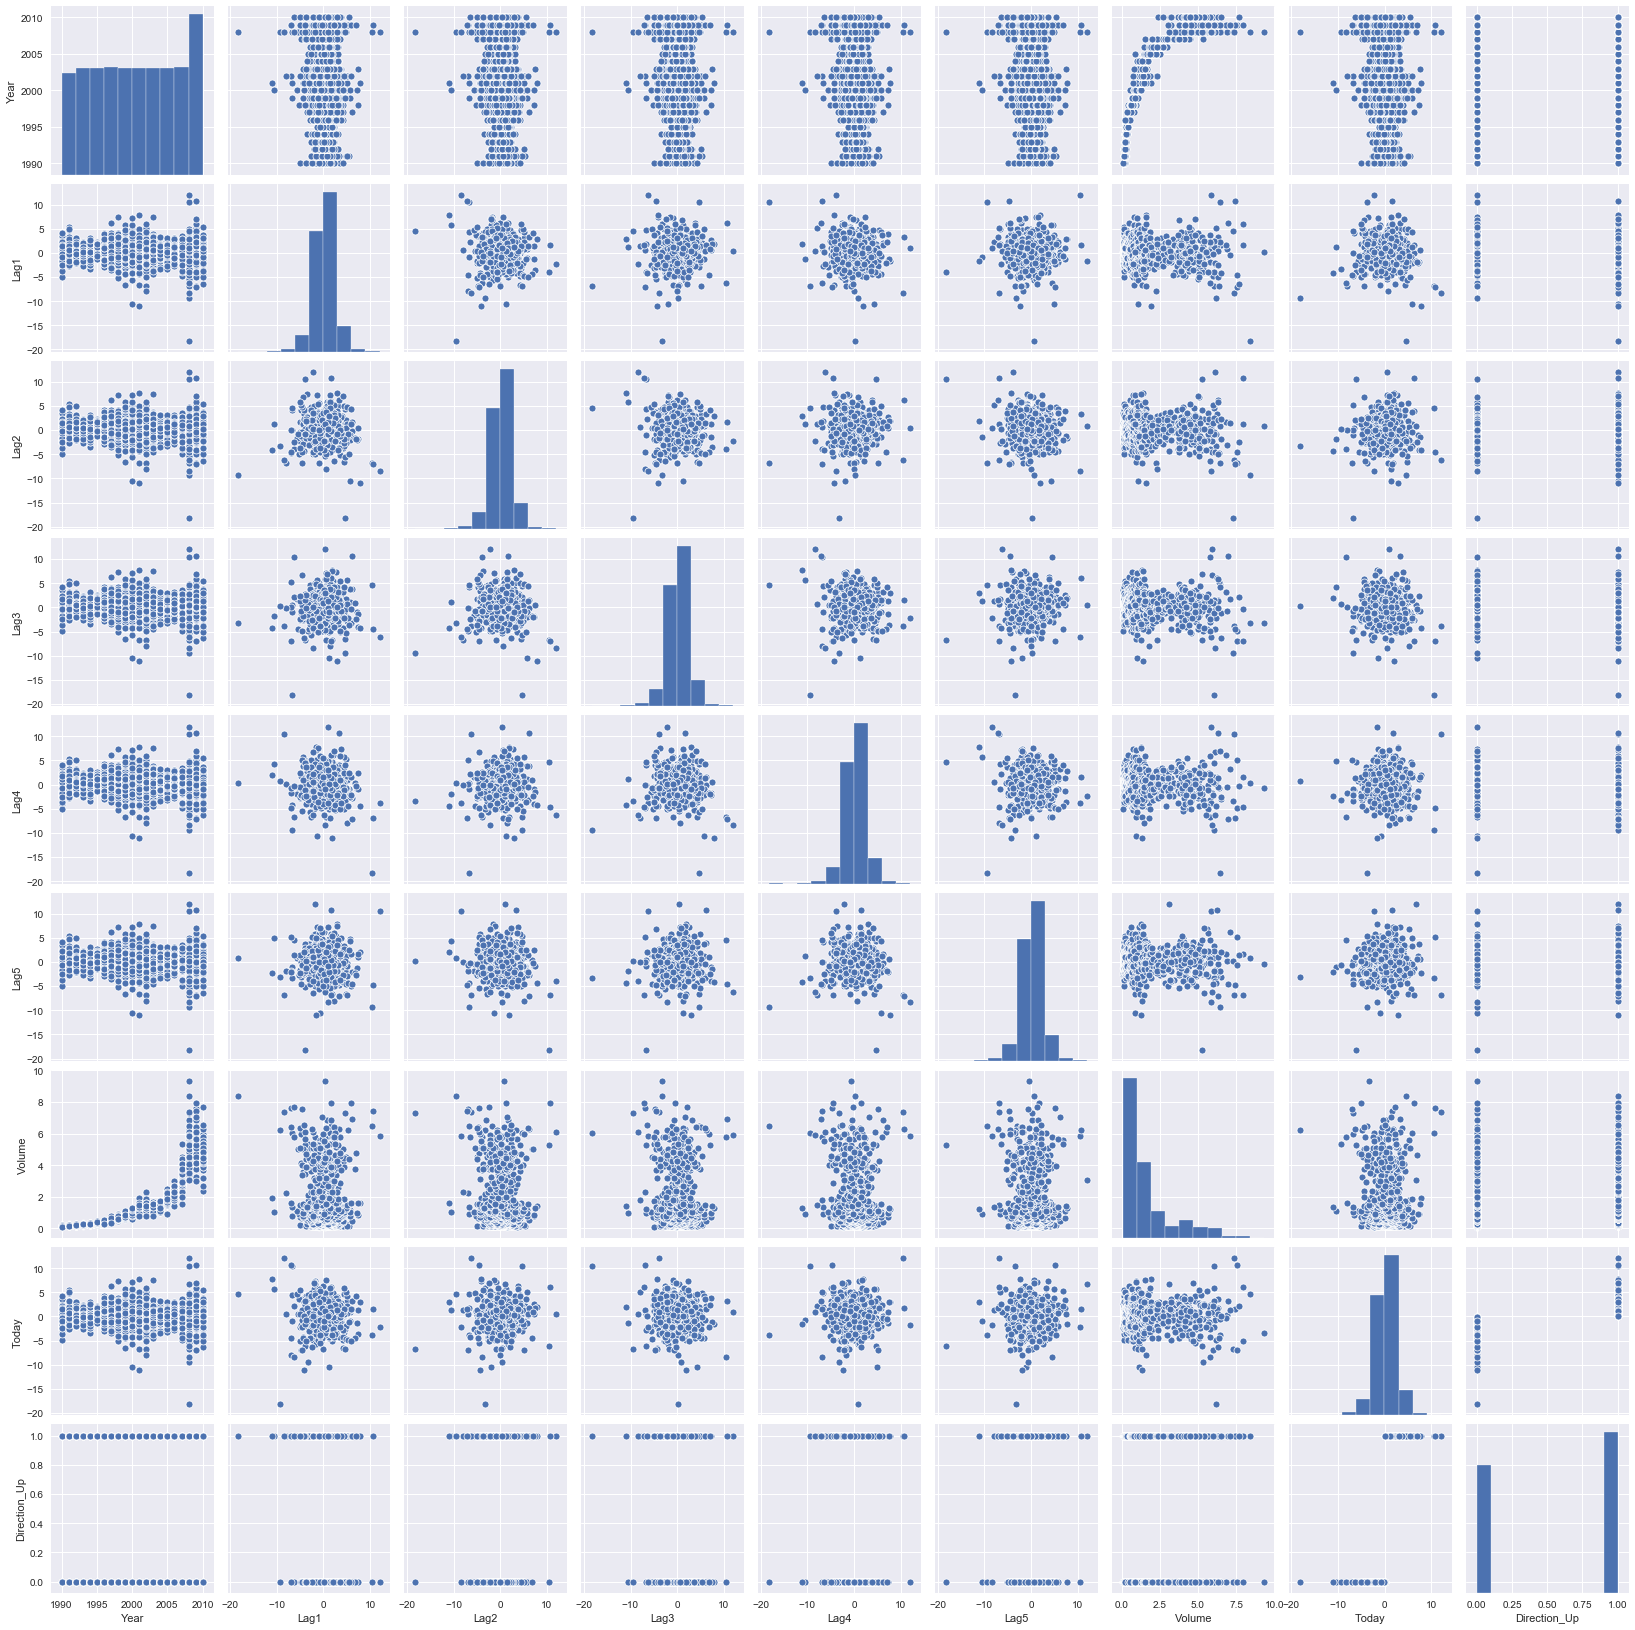

In [13]:
sns.pairplot(weekly_df)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text yticklabel objects>)

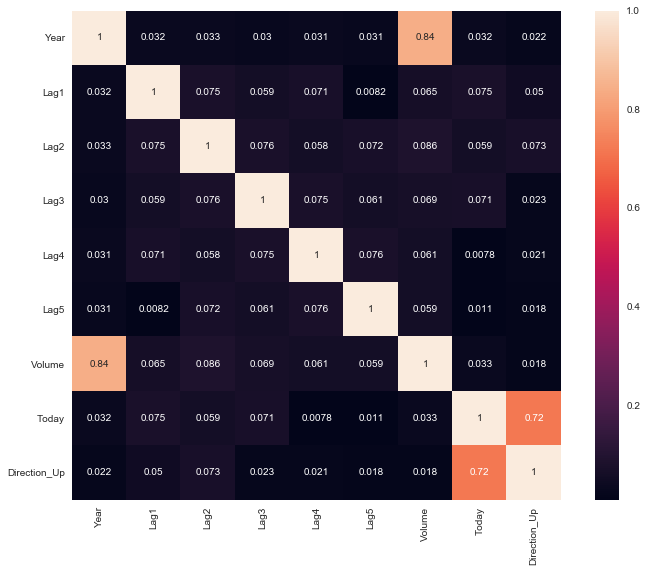

In [14]:
corr_matrix = weekly_df.corr().abs()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

### (b) Logistic regression

Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [15]:
predictors = weekly_df.columns.tolist()[1:-2]
predictors

['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

In [16]:
goal = weekly_df.columns.tolist()[-1]
f = str(goal) + ' ~ ' + ' + '.join(predictors)
f

'Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'

In [17]:
logit_fit = smf.logit(f, weekly_df).fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sat, 29 Feb 2020   Pseudo R-squ.:                0.006580
Time:                        14:05:51   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

In [18]:
pd.DataFrame({'p>|z|': logit_fit.pvalues[logit_fit.pvalues < 0.05].drop('Intercept')})

,p>|z|
Lag2,0.029601


### (c) Confusion matrix

Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [19]:
def loading(train_df, test_df, predictors, goal='Direction_Up'):
    X_train = train_df[predictors]
    y_train = train_df[goal]
    X_test = test_df[predictors]
    y_test = test_df[goal]
    return X_train, X_test, y_train, y_test

In [20]:
def classify(clf, data, coef=True, auc=False, roc_curve=False, conf_mat=False, conf_labels=['Down', 'Up']):
    X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]

    model = clf.fit(X_train, y_train)
    if coef:
        print('parameters: {}'.format(clf.coef_))
    
    acc = clf.score(X_test, y_test)
    print('accuracy: {}'.format(acc))
    
    y_pred = clf.predict(X_test)
    precision = precision_score(y_test, y_pred)
    print('precision: {}'.format(precision))
    
    recall = recall_score(y_test, y_pred)
    print('recall: {}'.format(recall))
    
    mat = confusion_matrix(y_test, y_pred)
    print('confusion matrix \n{}'.format(mat))
    
    if auc:
        y_score = model.decision_function(X_test)
        auc = roc_auc_score(y_test, y_score)
        print('auc: {}'.format(auc))
    
    if roc_curve:
        plot_roc_curve(clf, X_test, y_test)
    
    if conf_mat:
        plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, 
                              display_labels=conf_labels)
    
    return clf

In [21]:
predictors = weekly_df.columns.tolist()[1:-2]
data = loading(weekly_df, weekly_df, predictors=predictors, goal='Direction_Up')

log_clf = LogisticRegression(solver='lbfgs', tol=0.0001)
logreg = classify(log_clf, data)

parameters: [[-0.04123854  0.05840384 -0.01605138 -0.02776243 -0.01446302 -0.02270963]]
accuracy: 0.5610651974288338
precision: 0.5643363728470111
recall: 0.9206611570247933
confusion matrix 
[[ 54 430]
 [ 48 557]]


### (d) Split dataset

Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [22]:
train_df = weekly_df[weekly_df['Year'] < 2009]
test_df  = weekly_df[weekly_df['Year'] >= 2009]

In [23]:
data = loading(train_df, test_df, predictors=['Lag2'], goal='Direction_Up')

log_clf = LogisticRegression(solver='lbfgs', tol=0.0001)
logreg = classify(log_clf, data)

parameters: [[0.05804742]]
accuracy: 0.625
precision: 0.6222222222222222
recall: 0.9180327868852459
confusion matrix 
[[ 9 34]
 [ 5 56]]


### (e) Repeat (d) using LDA.

In [24]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf = classify(lda_clf, data)

parameters: [[0.05768451]]
accuracy: 0.625
precision: 0.6222222222222222
recall: 0.9180327868852459
confusion matrix 
[[ 9 34]
 [ 5 56]]


### (f) Repeat (d) using QDA.

In [25]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf = classify(qda_clf, data, coef=False)

accuracy: 0.5865384615384616
precision: 0.5865384615384616
recall: 1.0
confusion matrix 
[[ 0 43]
 [ 0 61]]


### (g) Repeat (d) using KNN with K = 1

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = classify(knn, data, coef=False)

accuracy: 0.49038461538461536
precision: 0.5769230769230769
recall: 0.4918032786885246
confusion matrix 
[[21 22]
 [31 30]]


### (h) Which of these methods appears to provide the best results on this data?

The Logistic Regression and LDA models produced the best results

### (i) Combinations of predictors

Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier

In [27]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5 = classify(knn5, data, coef=False)

accuracy: 0.5288461538461539
precision: 0.5909090909090909
recall: 0.639344262295082
confusion matrix 
[[16 27]
 [22 39]]


In [28]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10 = classify(knn10, data, coef=False)

accuracy: 0.5673076923076923
precision: 0.6379310344827587
recall: 0.6065573770491803
confusion matrix 
[[22 21]
 [24 37]]


## 11. Auto data set

### (a) Create a binary variable

Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` function. Note you may find it helpful to use the `data.frame()` function to create a single data set containing both mpg01 and the other Auto variables.

In [29]:
auto_df = pd.read_csv('./data/auto.csv')

auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)
auto_df = auto_df.reset_index()

datatypes = {'quant': ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin'],
             'qual': ['name']}

quants = auto_df[datatypes['quant']].astype(np.float_)
auto_df = pd.concat([quants, auto_df[datatypes['qual']]], axis=1) 

In [30]:
mpg01 = (auto_df['mpg'] > auto_df['mpg'].median()).astype(np.float64)
auto_df = pd.concat([auto_df, mpg01.rename('mpg01')], axis=1).drop('mpg', axis=1)
auto_df.head()

auto_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


### (b) Scatterplots and boxplots

Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

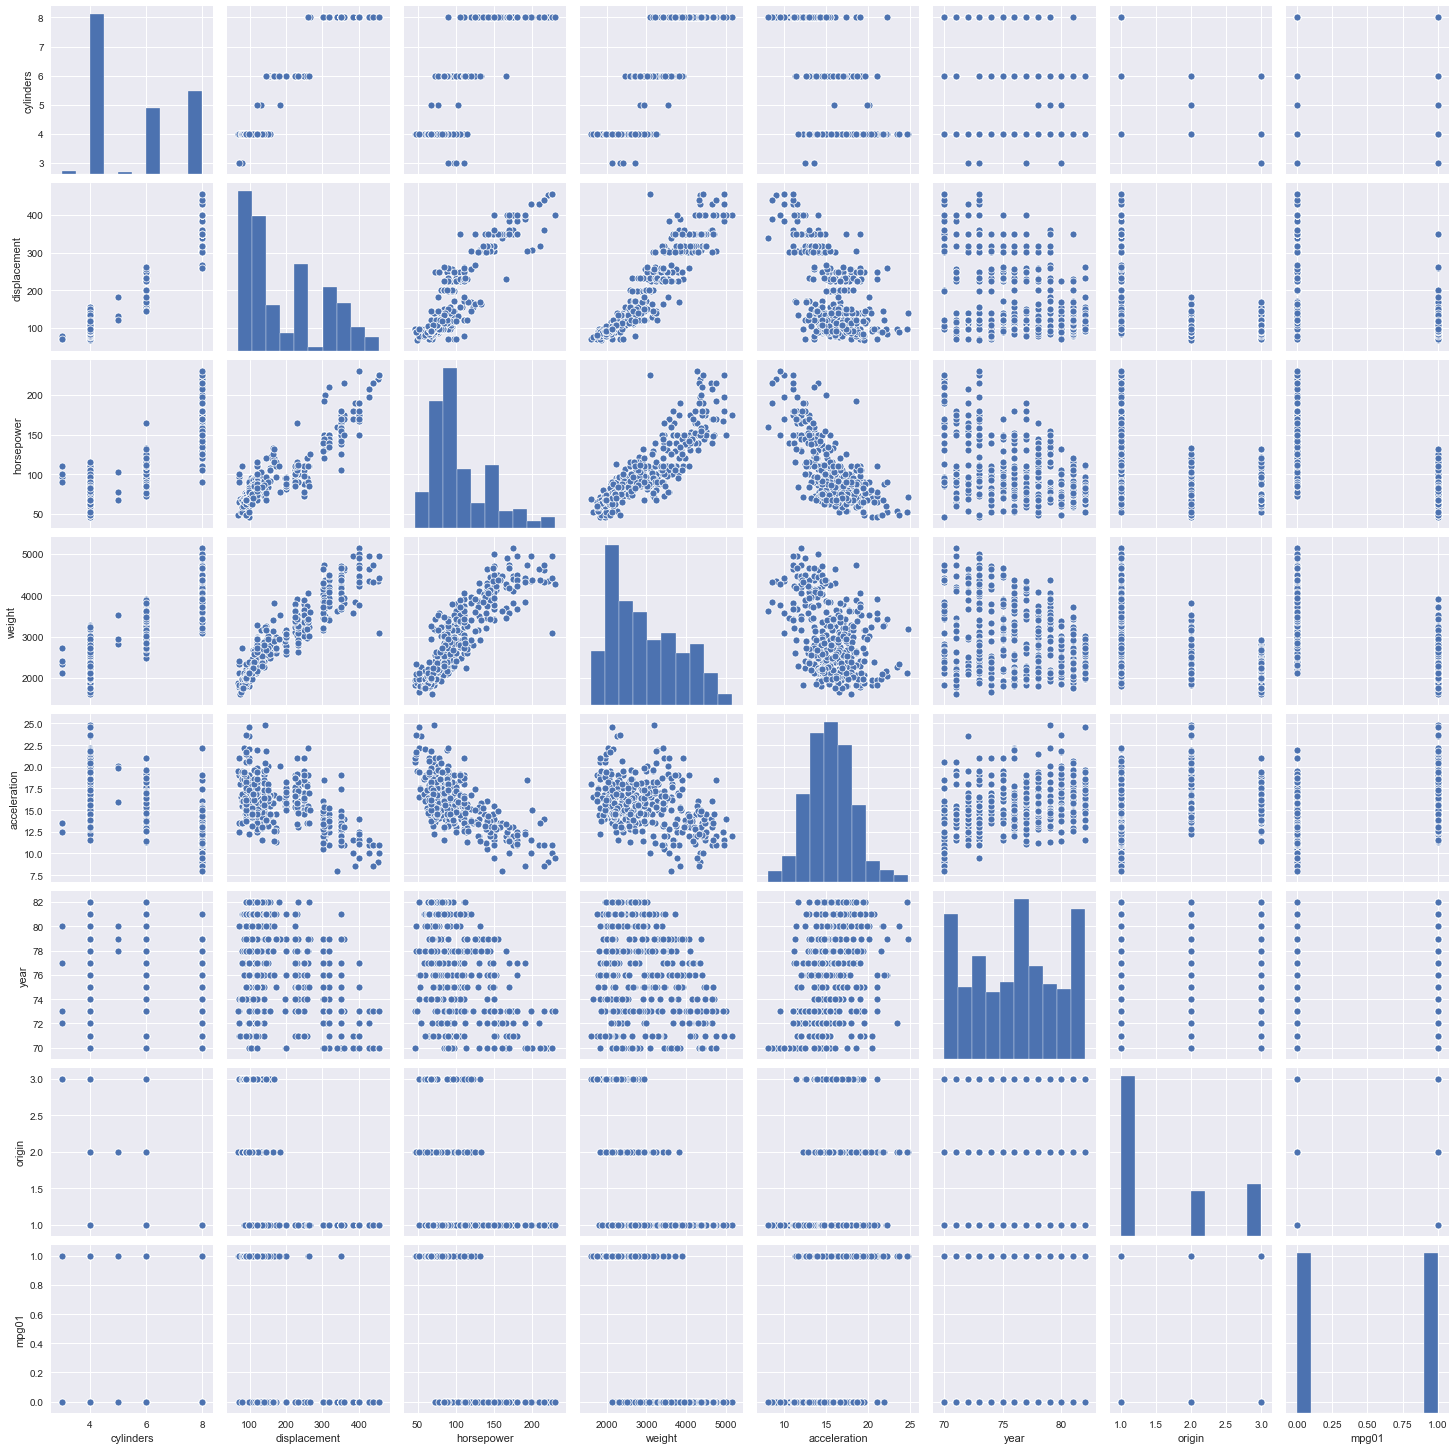

In [31]:
sns.pairplot(auto_df)

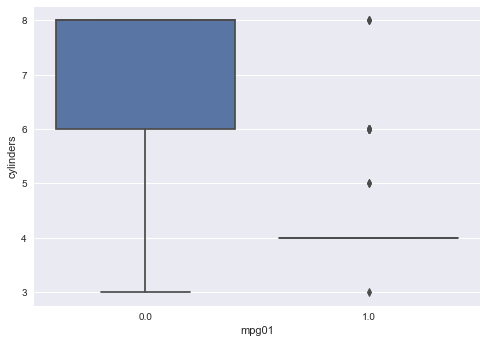

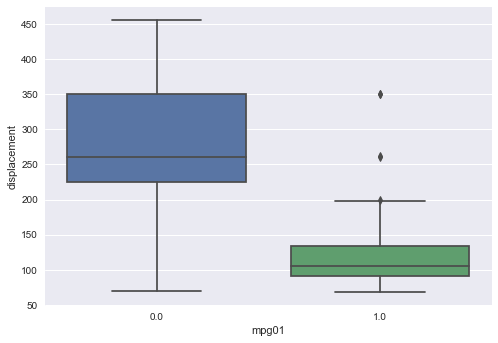

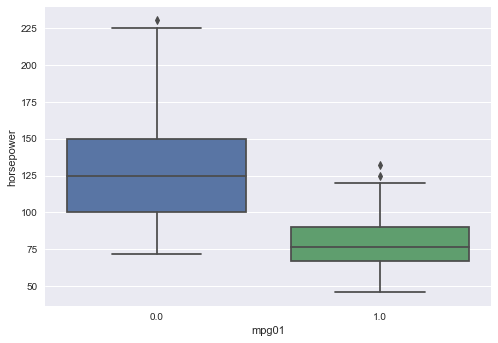

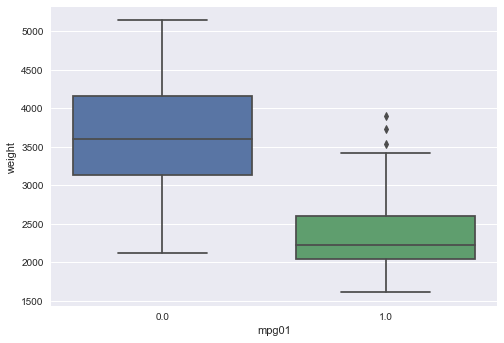

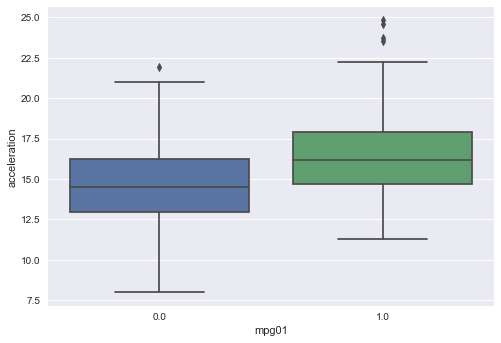

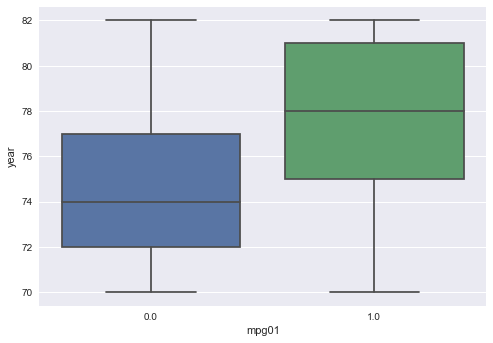

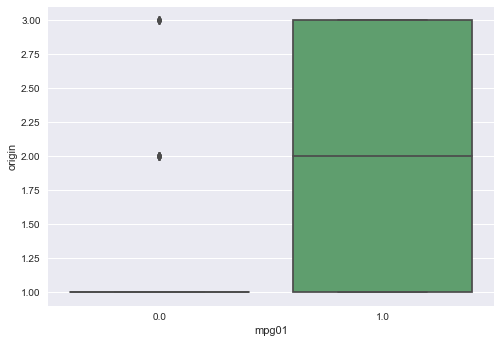

In [32]:
for c in auto_df.columns.drop(['mpg01', 'name']):
    sns.boxplot(x=auto_df['mpg01'], y=auto_df[c])
    plt.show()

Weight, displacement and cyclinders look like the most predictive features.

### (c) Split dataset

Split the data into a training set and a test set

In [33]:
predictors  = ['weight', 'cylinders', 'year', 'acceleration']
X = auto_df[predictors]
y = auto_df['mpg01']

data_auto = train_test_split(X, y, test_size=0.3, random_state=1)

### (d) Perform LDA

Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [34]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf = classify(lda_clf, data_auto)

parameters: [[-0.00269045 -0.87942485  0.32448625  0.020587  ]]
accuracy: 0.9067796610169492
precision: 0.8387096774193549
recall: 0.9811320754716981
confusion matrix 
[[55 10]
 [ 1 52]]


### (e) Perform QDA

Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [35]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf = classify(qda_clf, data_auto, coef=False)

accuracy: 0.923728813559322
precision: 0.8928571428571429
recall: 0.9433962264150944
confusion matrix 
[[59  6]
 [ 3 50]]


### (f) Perform Logistic regression

Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [36]:
log_clf = LogisticRegression(solver='lbfgs', tol=0.0001)
logreg = classify(log_clf, data_auto)

parameters: [[-0.0038596  -0.29999603  0.13868197  0.13133938]]
accuracy: 0.9491525423728814
precision: 0.9272727272727272
recall: 0.9622641509433962
confusion matrix 
[[61  4]
 [ 2 51]]


### (g) Perform KNN

Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [37]:
for i in [1, 5, 10, 15, 20]:
    print('*'*30)
    print('K = {}'.format(i))
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = classify(knn, data_auto, coef=False)

******************************
K = 1
accuracy: 0.8305084745762712
precision: 0.8
recall: 0.8301886792452831
confusion matrix 
[[54 11]
 [ 9 44]]
******************************
K = 5
accuracy: 0.8983050847457628
precision: 0.8727272727272727
recall: 0.9056603773584906
confusion matrix 
[[58  7]
 [ 5 48]]
******************************
K = 10
accuracy: 0.8983050847457628
precision: 0.847457627118644
recall: 0.9433962264150944
confusion matrix 
[[56  9]
 [ 3 50]]
******************************
K = 15
accuracy: 0.8813559322033898
precision: 0.819672131147541
recall: 0.9433962264150944
confusion matrix 
[[54 11]
 [ 3 50]]
******************************
K = 20
accuracy: 0.8813559322033898
precision: 0.819672131147541
recall: 0.9433962264150944
confusion matrix 
[[54 11]
 [ 3 50]]
